In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape


(808, 766, 3)

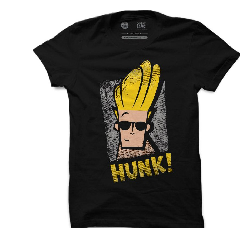

In [3]:
plt.figure()
plt.axis("off")
plt.imshow(image)


In [4]:
image.shape


(808, 766, 3)

In [5]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print image
print image.shape


[[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(618928, 3)


In [9]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print label


[0.5926585967996277, 0.3133773233720239, 0.09396407982834837]


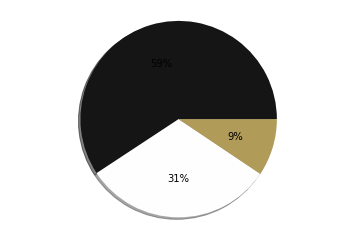

In [12]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True,  autopct="%0.0f%%") 
plt.axis('equal')
plt.show()


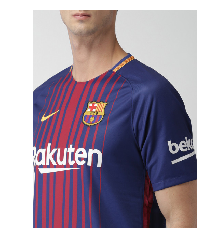

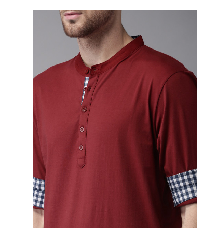

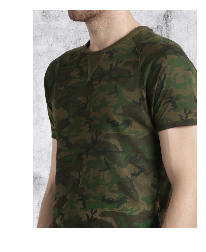

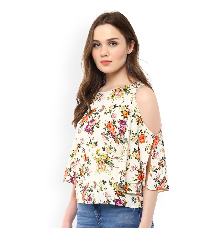

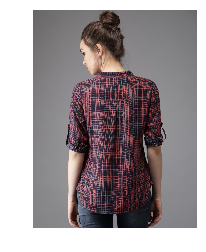

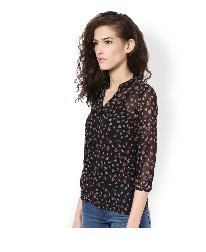

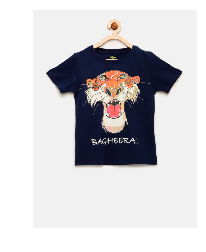

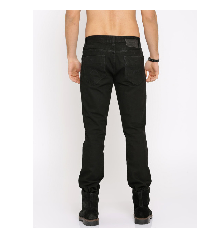

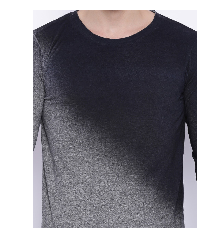

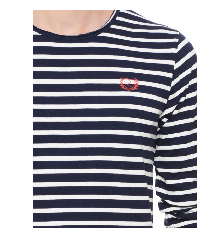

In [63]:
import glob
images=[]
files =glob.glob("C:\Users\Duggu\Anaconda2\ColoRify\Dominant Color Data Set\*.jpg")
for myfile in files:
    image = cv2.imread(myfile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append (image)
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

   


In [65]:
max_percentage = []
rgb_values = []
label = [0,0,0,0]
for i in range(len(images)):
    images[i] = images[i].reshape(images[i].shape[0] * images[i].shape[1], images[i].shape[2] )
    clf = KMeans(n_clusters=K)
    clf.fit(images[i])
    for x in clf.labels_:
        label[x] += 1
    label_sum = images[i].shape[0]
    label = [float(x) / label_sum for x in label]
    m = max(label)
    ind = label.index(max(label))
    m = m*100
    max_percentage.append(m)
    colors = [[int(value) for value in row] for row in clf.cluster_centers_]
    rgb_values.append(colors[ind])

In [66]:
print(max_percentage)
print(rgb_values)


[47.1875, 48.775791727701815, 58.63323438482483, 67.97675336339317, 63.1257005259966, 59.26697573415943, 71.4914038638533, 65.16245018757299, 56.889677843215644, 58.612026079239364]
[[48, 50, 91], [133, 46, 52], [48, 48, 35], [251, 250, 248], [140, 134, 136], [251, 251, 250], [240, 239, 238], [237, 234, 235], [40, 39, 49], [44, 45, 64]]


In [74]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

#requested_colour = (119, 172, 152)
color_name = []
for i in rgb_values:
    actual_name, closest_name = get_colour_name(i)
    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
    color_name.append(closest_name)

('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'brown')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'snow')
('Actual colour name:', None, ', closest colour name:', u'grey')
('Actual colour name:', None, ', closest colour name:', u'snow')
('Actual colour name:', None, ', closest colour name:', u'whitesmoke')
('Actual colour name:', None, ', closest colour name:', u'linen')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')


In [68]:
color_name

[u'darkslategray',
 u'brown',
 u'darkslategray',
 u'snow',
 u'grey',
 u'snow',
 u'whitesmoke',
 u'linen',
 u'darkslategray',
 u'darkslategray']

In [69]:
max_percentage

[47.1875,
 48.775791727701815,
 58.63323438482483,
 67.97675336339317,
 63.1257005259966,
 59.26697573415943,
 71.4914038638533,
 65.16245018757299,
 56.889677843215644,
 58.612026079239364]

In [70]:
list_of_tuple = list(zip(color_name,max_percentage))
list_of_list = [list(x) for x in list_of_tuple]

In [71]:
list_of_list

[[u'darkslategray', 47.1875],
 [u'brown', 48.775791727701815],
 [u'darkslategray', 58.63323438482483],
 [u'snow', 67.97675336339317],
 [u'grey', 63.1257005259966],
 [u'snow', 59.26697573415943],
 [u'whitesmoke', 71.4914038638533],
 [u'linen', 65.16245018757299],
 [u'darkslategray', 56.889677843215644],
 [u'darkslategray', 58.612026079239364]]

In [72]:
m = 0;
avg_p = []
col = []
for i in list_of_list:
    c = 0
    avg = 0
    l = i[0]
    if l not in col:
        for j in list_of_list:
            if(l==j[0]):
                avg += j[1]
                c += 1
        m = avg/c
        print(m)
        avg_p.append(m)
        col.append(l)
    
print(col)


55.3306095768
48.7757917277
63.6218645488
63.125700526
71.4914038639
65.1624501876
[u'darkslategray', u'brown', u'snow', u'grey', u'whitesmoke', u'linen']


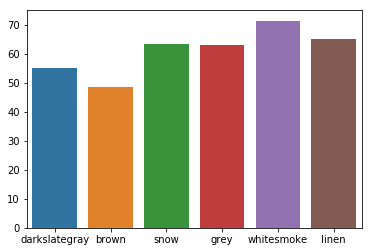

In [73]:
import seaborn as sns
sns.barplot(col, avg_p)
